## Weather Prediction using LSTM(LONG SHORT TERM MEMORY) AND SIMPLE RNN(RECURRENT NEURAL NETWORK)

### 1.Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set_style("whitegrid")

### 2.Loading the Dataset

In [5]:
# Load dataset
df = pd.read_csv("weatherHistory.csv")

# Check the shape and data types
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Preview the data
df.head()

Shape of dataset: (96453, 12)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### 3.Descriptive Statistics

In [7]:
# Summary statistics of numeric columns
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### 4.Temperature Variance - (histogram view)

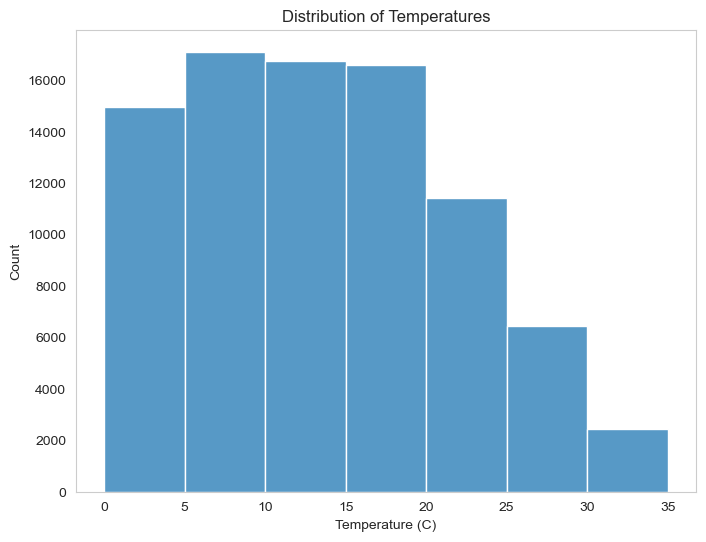

In [9]:
# plot to see the temperature varience
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature (C)'],bins=[i for i in range(0,40,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

### 5.Data Cleaning

#### 5.1 Drop Unnecessary Columns

In [12]:
# Rename incorrectly named columns (if any)
df.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace=True)

# Drop unwanted columns
df_clean = df.drop(columns=["Summary", "Daily Summary", "Precip Type","Wind Bearing (degrees)"])

#### 5.2 Parse and Extract Datetime Features

In [14]:
# Convert to datetime
df_clean['Formatted Date'] = pd.to_datetime(df_clean['Formatted Date'],utc="True")

# Extract features
df_clean['year'] = df_clean['Formatted Date'].dt.year
df_clean['month'] = df_clean['Formatted Date'].dt.month
df_clean['day'] = df_clean['Formatted Date'].dt.day
df_clean['hour'] = df_clean['Formatted Date'].dt.hour

# Drop original datetime column
df_clean = df_clean.drop(columns=['Formatted Date'])

# Display cleaned dataset
df_clean.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Cloud Cover,Pressure (millibars),year,month,day,hour
0,9.472222,7.388889,0.89,14.1197,15.8263,0.0,1015.13,2006,3,31,22
1,9.355556,7.227778,0.86,14.2646,15.8263,0.0,1015.63,2006,3,31,23
2,9.377778,9.377778,0.89,3.9284,14.9569,0.0,1015.94,2006,4,1,0
3,8.288889,5.944444,0.83,14.1036,15.8263,0.0,1016.41,2006,4,1,1
4,8.755556,6.977778,0.83,11.0446,15.8263,0.0,1016.51,2006,4,1,2


#### 5.4 Drop any remaining missing Values

In [16]:
# Drop missing rows (if any remain)
df_clean = df_clean.dropna()

# Double-check
df_clean.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
year                        0
month                       0
day                         0
hour                        0
dtype: int64

### 6.Normalize the data

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
target_column = 'Temperature (C)'
features = df_clean.drop(columns=[target_column])
target = df_clean[[target_column]]

# Initialize scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit and transform the data
scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)

print("Features shape:", scaled_features.shape)
print("Target shape:", scaled_target.shape)

Features shape: (96453, 10)
Target shape: (96453, 1)


### 7.Create Time Series Sequences

In [20]:
sequence_length = 24  # using past 24 hours

X = []
y = []

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i - sequence_length:i])  # 24 past time steps
    y.append(scaled_target[i])  # target is temperature at next hour

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Input shape (X):", X.shape)  # (samples, 24, num_features)
print("Output shape (y):", y.shape)  # (samples, 1)


Input shape (X): (96429, 24, 10)
Output shape (y): (96429, 1)


### 8.Train-Test Split

In [22]:
# Determine sizes
total_samples = X.shape[0]
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

# Split the data
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print("Training shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (67500, 24, 10) (67500, 1)
Validation shape: (14464, 24, 10) (14464, 1)
Testing shape: (14465, 24, 10) (14465, 1)


#### 9.Build & Train the LSTM Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Use Input layer here
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))  # Output layer

# Compile model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    shuffle=False,
    verbose=1
)

Epoch 1/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 78s 63ms/step - loss: 0.0318 - val_loss: 0.0182
Epoch 2/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - loss: 0.0288 - val_loss: 0.0189
Epoch 3/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - loss: 0.0099 - val_loss: 0.0035
Epoch 4/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 5/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 6/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 93s 88ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 7/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - loss: 0.0024 - val_loss: 8.7073e-04
Epoch 8/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 70s 66ms/step - loss: 0.0021 - val_loss: 8.2919e-04
Epoch 9/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 65s 61ms/step - loss: 0.0019 - val_loss: 7.4146e-04
Epoch 10/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 68s 64ms/step - loss: 0.0018 - val_loss: 7.4318e-04
Epoch 11/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - loss: 0.0016 - val_loss:

### 10.Plot Training vs. Validation Loss

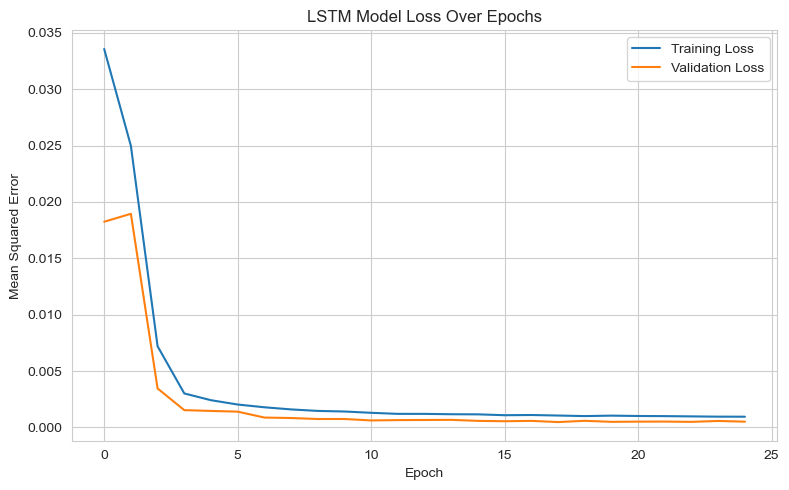

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 11.LSTM Accuracy Metrics

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict and inverse scale
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm_inv = target_scaler.inverse_transform(y_pred_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)

# Metrics
mse_lstm = mean_squared_error(y_test_inv, y_pred_lstm_inv)
mae_lstm = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
r2_lstm = r2_score(y_test_inv, y_pred_lstm_inv)

print("Accuracy Metrics for LSTM:")
print(f"MSE: {mse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")
print(f"R²:  {r2_lstm:.4f}")

453/453 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
Accuracy Metrics for LSTM:
MSE: 1.4842
MAE: 0.8658
R²:  0.9814


### 12.Build & Train the RNN Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Callbacks
early_stopping_rnn = EarlyStopping(
    monitor='val_loss',
    patience=5,                   # Early stop quicker
    restore_best_weights=True,
    verbose=1
)

reduce_lr_rnn = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Build RNN Model
rnn_model = Sequential()
rnn_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(SimpleRNN(128, return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(64, return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(32, return_sequences=False))
rnn_model.add(Dropout(0.2))

rnn_model.add(Dense(1))  # Output

# Compile
rnn_model.compile(optimizer='adam', loss='mse')

# Train
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_rnn, reduce_lr_rnn],
    shuffle=False,
    verbose=1
)

Epoch 1/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.1849 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 2/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - loss: 0.0170 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 3/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - loss: 0.0076 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 4/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - loss: 0.0071 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 5/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - loss: 0.0060 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 6/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - loss: 0.0048 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 7/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - loss: 0.0046 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 8/50
1053/1055 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - loss: 0.0

### 13.Plot Training v/s validation loss

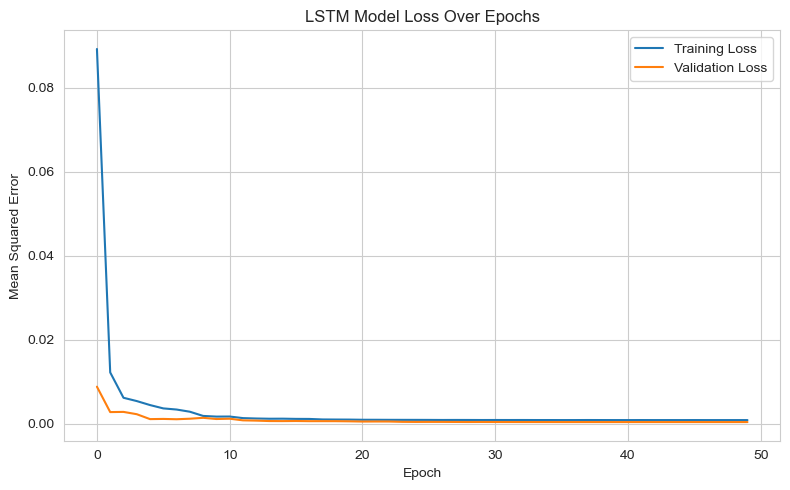

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 14.RNN Accuracy Metrics

In [34]:
# Predict and inverse scale
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn_inv = target_scaler.inverse_transform(y_pred_rnn)

# Metrics
mse_rnn = mean_squared_error(y_test_inv, y_pred_rnn_inv)
mae_rnn = mean_absolute_error(y_test_inv, y_pred_rnn_inv)
r2_rnn = r2_score(y_test_inv, y_pred_rnn_inv)

print("Accuracy Metrics for RNN:")
print(f"MSE: {mse_rnn:.4f}")
print(f"MAE: {mae_rnn:.4f}")
print(f"R²:  {r2_rnn:.4f}")

453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Accuracy Metrics for RNN:
MSE: 1.3898
MAE: 0.8140
R²:  0.9826


### 15.Compare Loss Curves of LSTM V/S RNN

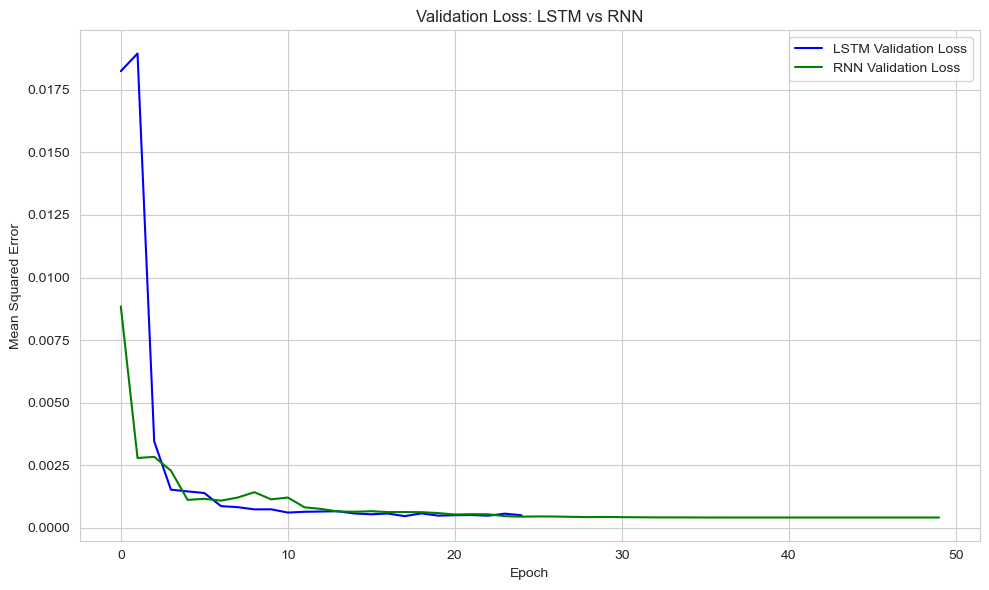

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss', color='green')
plt.title('Validation Loss: LSTM vs RNN')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 16.Ensemble (Average) Accuracy Metrics

In [38]:
# Average predictions and inverse scale
y_pred_ensemble = (y_pred_lstm + y_pred_rnn) / 2
y_pred_ensemble_inv = target_scaler.inverse_transform(y_pred_ensemble)

# Metrics
mse_ensemble = mean_squared_error(y_test_inv, y_pred_ensemble_inv)
mae_ensemble = mean_absolute_error(y_test_inv, y_pred_ensemble_inv)
r2_ensemble = r2_score(y_test_inv, y_pred_ensemble_inv)

print("Accuracy Metrics for Ensemble (Average):")
print(f"MSE: {mse_ensemble:.4f}")
print(f"MAE: {mae_ensemble:.4f}")
print(f"R²:  {r2_ensemble:.4f}")

Accuracy Metrics for Ensemble (Average):
MSE: 1.3108
MAE: 0.7756
R²:  0.9836


### 17.Predict + Average Model Outputs

453/453 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step
453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


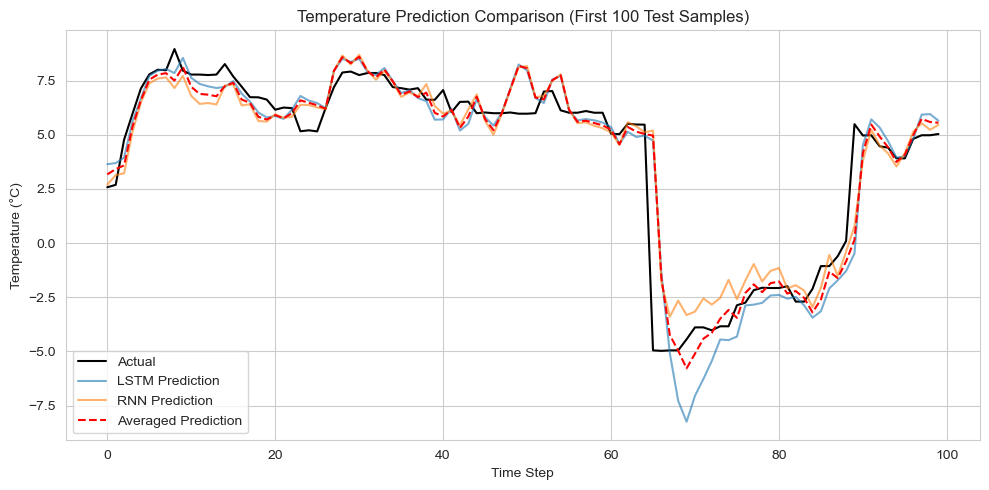

In [40]:
# Predict with both models
y_pred_lstm = lstm_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test)

# Average predictions
y_pred_avg = (y_pred_lstm + y_pred_rnn) / 2

# Inverse transform predictions and true values
y_pred_lstm_inv = target_scaler.inverse_transform(y_pred_lstm)
y_pred_rnn_inv = target_scaler.inverse_transform(y_pred_rnn)
y_pred_avg_inv = target_scaler.inverse_transform(y_pred_avg)
y_test_inv = target_scaler.inverse_transform(y_test)

# Compare actual vs. predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:100], label='Actual', color='black')
plt.plot(y_pred_lstm_inv[:100], label='LSTM Prediction', alpha=0.6)
plt.plot(y_pred_rnn_inv[:100], label='RNN Prediction', alpha=0.6)
plt.plot(y_pred_avg_inv[:100], label='Averaged Prediction', linestyle='--', color='red')
plt.title("Temperature Prediction Comparison (First 100 Test Samples)")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

### 18.Predict from User Input (with Past Data)

In [42]:
# Set datetime index if not already done
df_clean.index = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

In [43]:
from datetime import datetime, timedelta
import numpy as np

def predict_temperature_user_input():
    try:
        # Get user input
        year = int(input("Enter year (e.g., 2016): "))
        month = int(input("Enter month (1-12): "))
        day = int(input("Enter day (1-31): "))
        hour = int(input("Enter hour (0-23): "))

        # Create datetime object
        input_time = datetime(year, month, day, hour)
        start_time = input_time - timedelta(hours=24)

        # Filter 24 previous hours
        mask = (df_clean.index >= start_time) & (df_clean.index < input_time)
        input_data = df_clean.loc[mask].drop(columns=['Temperature (C)'])

        if input_data.shape[0] < 24:
            print("Not enough historical data to make a prediction.")
            return None

        # Scale and predict
        scaled_input = feature_scaler.transform(input_data)
        X_input = np.expand_dims(scaled_input, axis=0)

        pred_lstm = lstm_model.predict(X_input)
        pred_rnn = rnn_model.predict(X_input)
        pred_avg = (pred_lstm + pred_rnn) / 2

        temperature_pred = target_scaler.inverse_transform(pred_avg)[0][0]

        # Get actual temperature
        if input_time in df_clean.index:
            actual_temp = df_clean.loc[input_time]['Temperature (C)']
            abs_error = abs(actual_temp - temperature_pred)
            accuracy = 100 - (abs_error / abs(actual_temp)) * 100

            print(f"\nPrediction for {input_time.strftime('%Y-%m-%d %H:%M')}")
            print(f"Predicted Temperature: {temperature_pred:.2f}°C")
            print(f"Actual Temperature:    {actual_temp:.2f}°C")
            print(f"Absolute Error:         {abs_error:.2f}°C")
            print(f"Accuracy:               {accuracy:.2f}%")
        else:
            print(f"\nPredicted Temperature for {input_time.strftime('%Y-%m-%d %H:%M')}: {temperature_pred:.2f}°C")
            print("⚠Actual temperature not available in dataset.")

        return temperature_pred

    except Exception as e:
        print("Invalid input or prediction error:", str(e))
predict_temperature_user_input()

Enter year (e.g., 2016):  2009
Enter month (1-12):  11
Enter day (1-31):  24
Enter hour (0-23):  12


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Prediction for 2009-11-24 12:00
Predicted Temperature: 7.89°C
Actual Temperature:    8.02°C
Absolute Error:         0.14°C
Accuracy:               98.31%


7.8862567